# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data
In this module, we need to initialize and import the train_data, valid_data and test_data
Using panda is easily to access the csv file.

In [1]:
# Load pickled data
import cv2
import pickle
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.io.parsers import read_csv
from skimage import transform as transf



# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
validation_file='dataset/valid.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
sign_names = read_csv("signnames.csv").values[:, 1]
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In this modul, we will get the shape of train_data, valid_data and test_data .

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?

image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# By using the np.unique we can get the numbers , indices and counts of different classes in original data.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


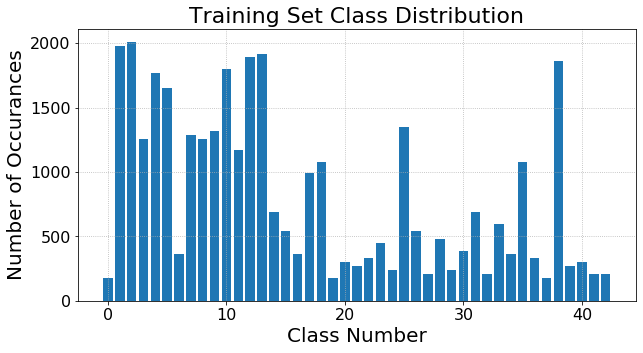

In [3]:
# By using plt we can draw the histogram of class distribution of data
plt.figure(0, figsize = (10,5))
train_classes, train_counts = np.unique(y_train, return_counts = True)
plt.bar(train_classes, train_counts)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

0 . Class :  Speed limit (20km/h)


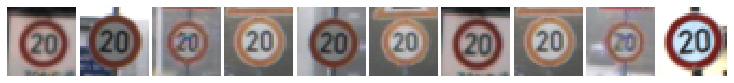

1 . Class :  Speed limit (30km/h)


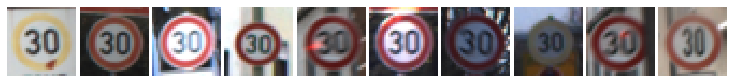

2 . Class :  Speed limit (50km/h)


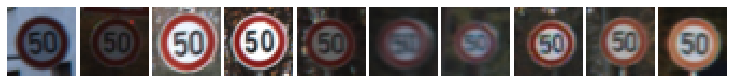

3 . Class :  Speed limit (60km/h)


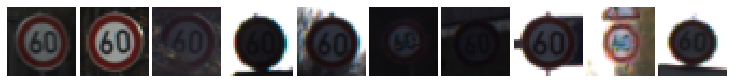

4 . Class :  Speed limit (70km/h)


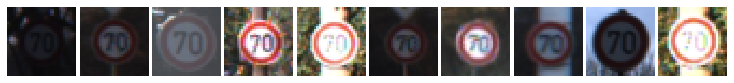

5 . Class :  Speed limit (80km/h)


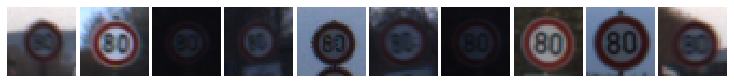

6 . Class :  End of speed limit (80km/h)


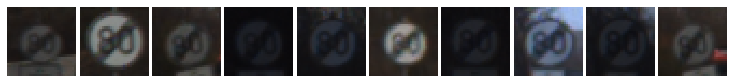

7 . Class :  Speed limit (100km/h)


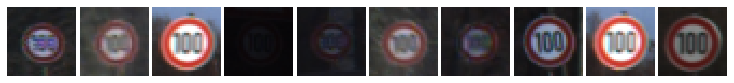

8 . Class :  Speed limit (120km/h)


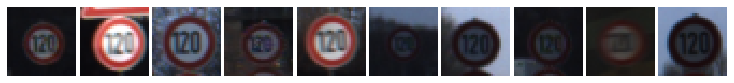

9 . Class :  No passing


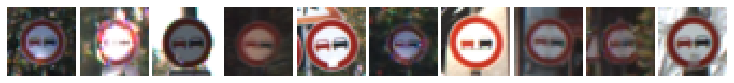

10 . Class :  No passing for vehicles over 3.5 metric tons


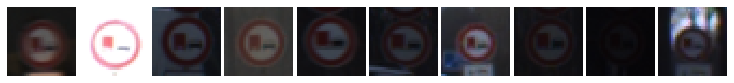

11 . Class :  Right-of-way at the next intersection


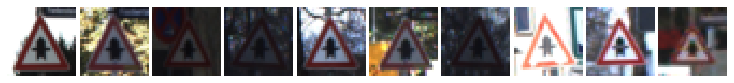

12 . Class :  Priority road


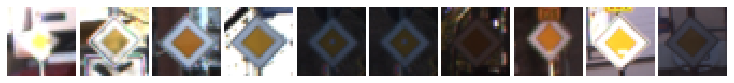

13 . Class :  Yield


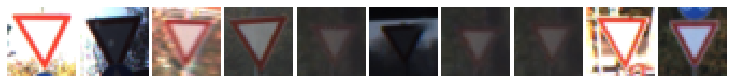

14 . Class :  Stop


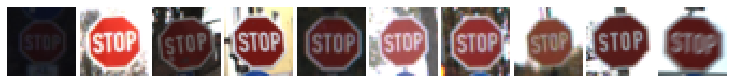

15 . Class :  No vehicles


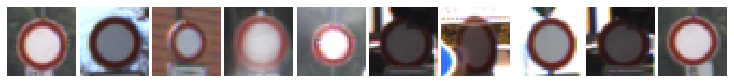

16 . Class :  Vehicles over 3.5 metric tons prohibited


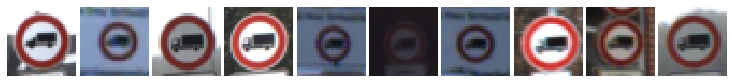

17 . Class :  No entry


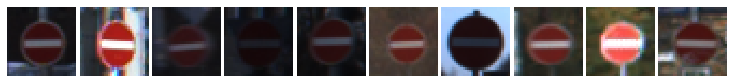

18 . Class :  General caution


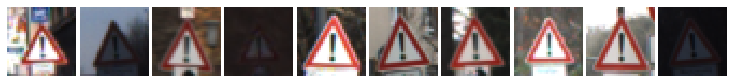

19 . Class :  Dangerous curve to the left


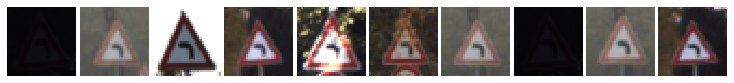

20 . Class :  Dangerous curve to the right


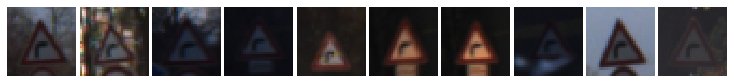

21 . Class :  Double curve


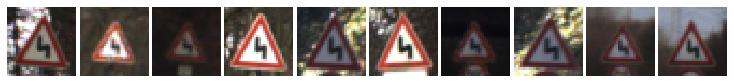

22 . Class :  Bumpy road


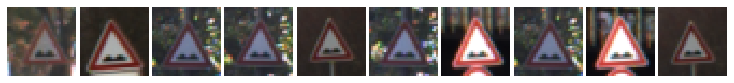

23 . Class :  Slippery road


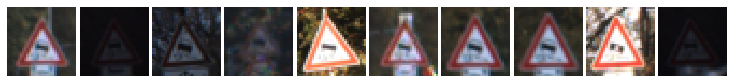

24 . Class :  Road narrows on the right


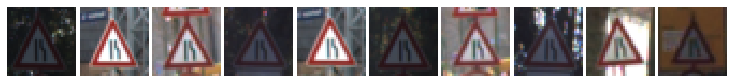

25 . Class :  Road work


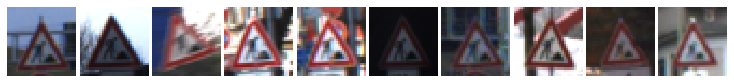

26 . Class :  Traffic signals


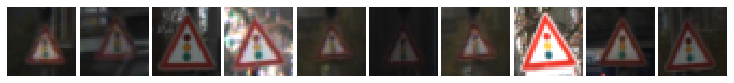

27 . Class :  Pedestrians


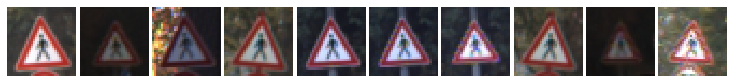

28 . Class :  Children crossing


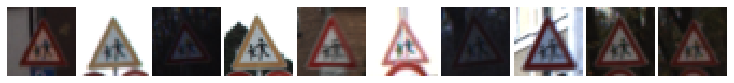

29 . Class :  Bicycles crossing


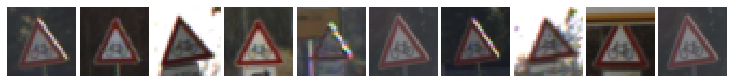

30 . Class :  Beware of ice/snow


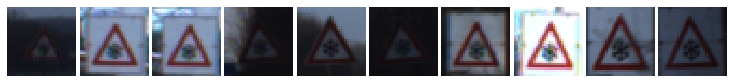

31 . Class :  Wild animals crossing


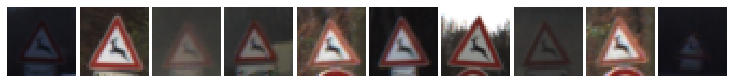

32 . Class :  End of all speed and passing limits


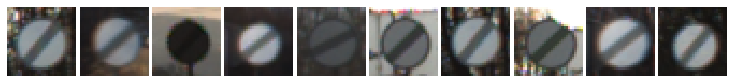

33 . Class :  Turn right ahead


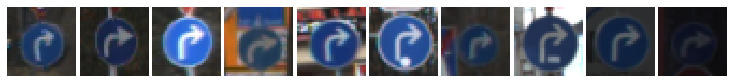

34 . Class :  Turn left ahead


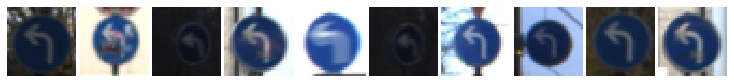

35 . Class :  Ahead only


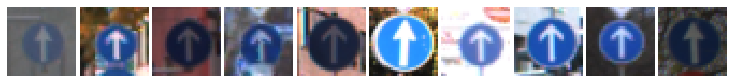

36 . Class :  Go straight or right


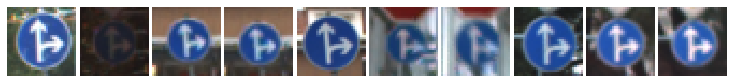

37 . Class :  Go straight or left


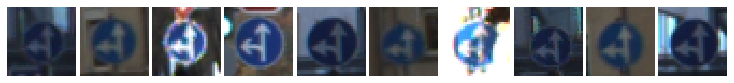

38 . Class :  Keep right


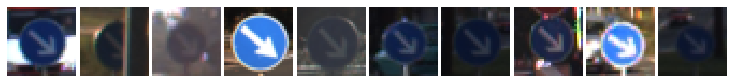

39 . Class :  Keep left


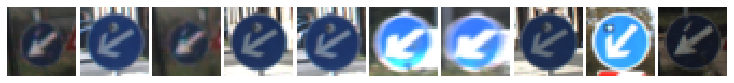

40 . Class :  Roundabout mandatory


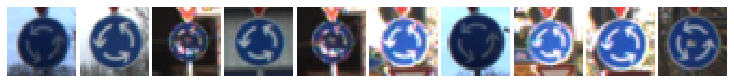

41 . Class :  End of no passing


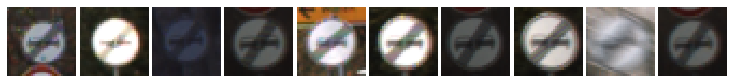

42 . Class :  End of no passing by vehicles over 3.5 metric tons


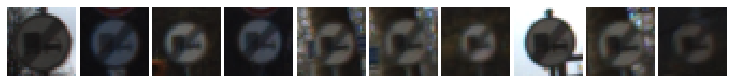

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for each_c, each_c_i, each_c_c in zip(classes, class_indices, class_counts):
    print(each_c, ". Class : ", sign_names[each_c] )
    figs,axes=plt.subplots(1,10,figsize=(10,1))
    figs.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        random_indices = np.random.randint(each_c_i, each_c_i+each_c_c, 10)
        axes[i].imshow(X_train[random_indices[i],:,:,:]) 
        axes[i].axis('off')        
    pyplot.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.


In this modul, we will perform data augmentation. It include rotation, translation, scaling, shear and light-change operation.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


def random_transform(img,angle_range=[-10,10],
                    scale_range=[0.8,1.2],
                    translation_range=[-5,5],
                    shear_range=[-0.2,0.2]):
    # Generate random parameter values
    rotated_img = 255*transf.rotate(img, angle=np.random.uniform(angle_range[0], angle_range[1]), mode='edge')
    translated_img = transf.warp(rotated_img, transf.SimilarityTransform(translation=(np.random.uniform(translation_range[0], translation_range[1]), np.random.uniform(translation_range[0], translation_range[1]))),mode='edge')
    scaled_img = transf.warp(translated_img,
                  transf.AffineTransform(scale=(np.random.uniform(scale_range[0], scale_range[1]), np.random.uniform(scale_range[0],scale_range[1])), shear=np.random.uniform(shear_range[0],shear_range[1])),
                  mode='edge')

    return scaled_img.astype(np.uint8)

def random_brightness(image,min_bright=0.25,max_bright=1):
    image = image.astype(np.uint8)
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = np.random.uniform(min_bright, max_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1



In [6]:
# Combine all data augmentation methods.
def transform_image(image):
    result=random_transform(random_brightness(image)).astype(np.uint8)
    return  result
    

0 . Class :  Speed limit (20km/h)


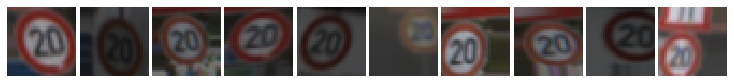

1 . Class :  Speed limit (30km/h)


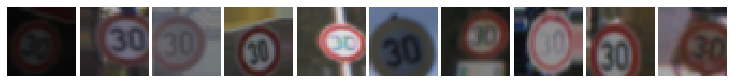

2 . Class :  Speed limit (50km/h)


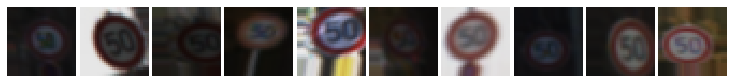

3 . Class :  Speed limit (60km/h)


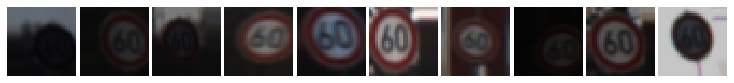

4 . Class :  Speed limit (70km/h)


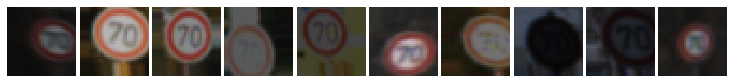

5 . Class :  Speed limit (80km/h)


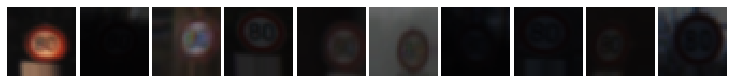

6 . Class :  End of speed limit (80km/h)


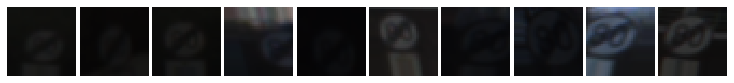

7 . Class :  Speed limit (100km/h)


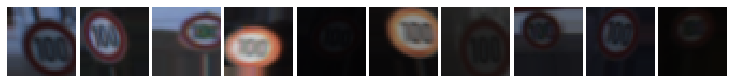

8 . Class :  Speed limit (120km/h)


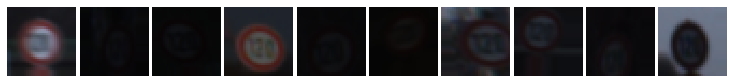

9 . Class :  No passing


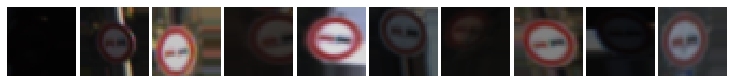

10 . Class :  No passing for vehicles over 3.5 metric tons


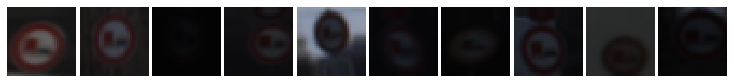

11 . Class :  Right-of-way at the next intersection


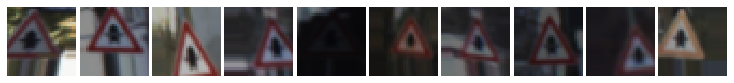

12 . Class :  Priority road


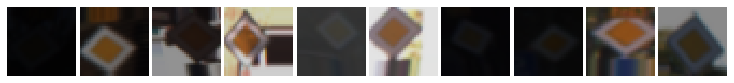

13 . Class :  Yield


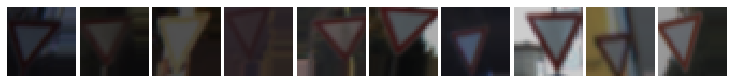

14 . Class :  Stop


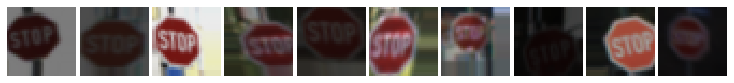

15 . Class :  No vehicles


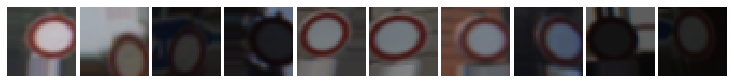

16 . Class :  Vehicles over 3.5 metric tons prohibited


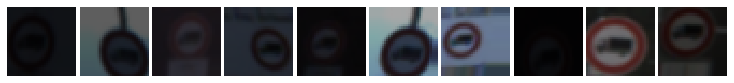

17 . Class :  No entry


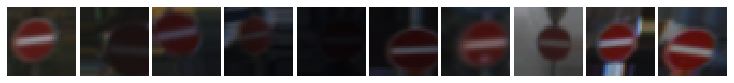

18 . Class :  General caution


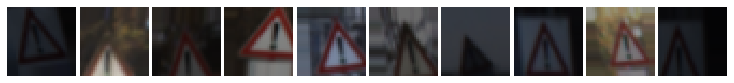

19 . Class :  Dangerous curve to the left


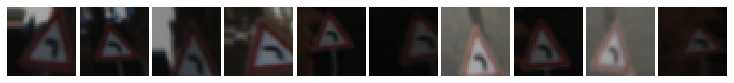

20 . Class :  Dangerous curve to the right


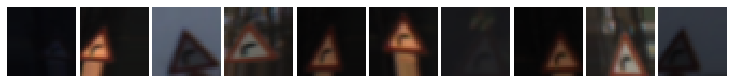

21 . Class :  Double curve


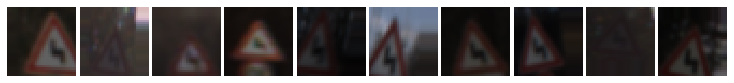

22 . Class :  Bumpy road


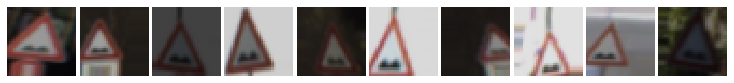

23 . Class :  Slippery road


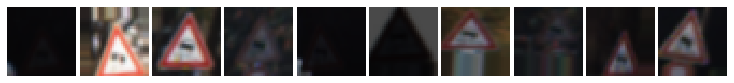

24 . Class :  Road narrows on the right


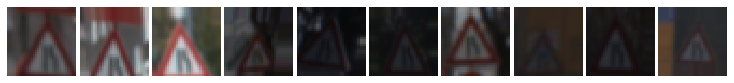

25 . Class :  Road work


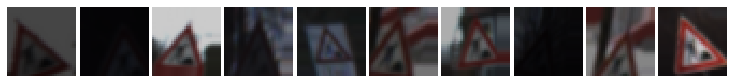

26 . Class :  Traffic signals


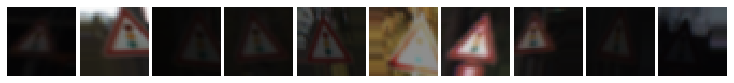

27 . Class :  Pedestrians


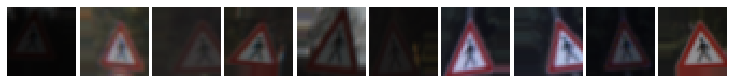

28 . Class :  Children crossing


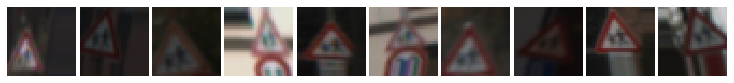

29 . Class :  Bicycles crossing


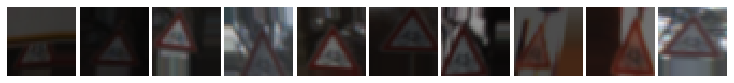

30 . Class :  Beware of ice/snow


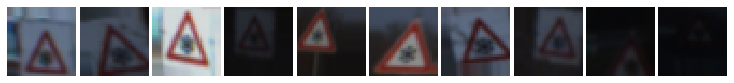

31 . Class :  Wild animals crossing


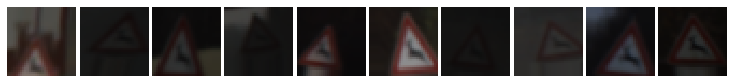

32 . Class :  End of all speed and passing limits


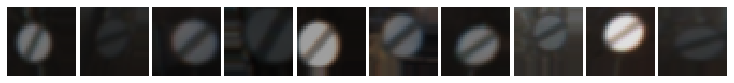

33 . Class :  Turn right ahead


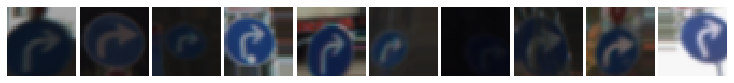

34 . Class :  Turn left ahead


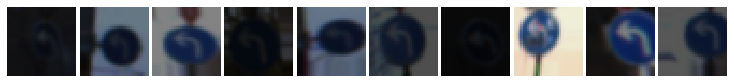

35 . Class :  Ahead only


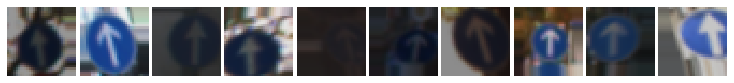

36 . Class :  Go straight or right


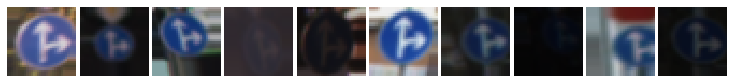

37 . Class :  Go straight or left


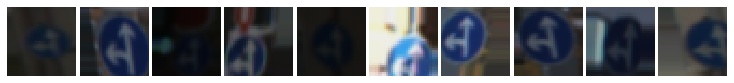

38 . Class :  Keep right


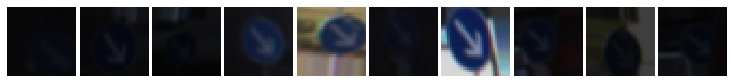

39 . Class :  Keep left


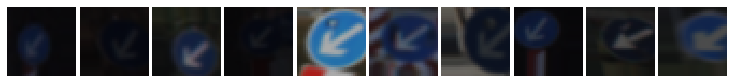

40 . Class :  Roundabout mandatory


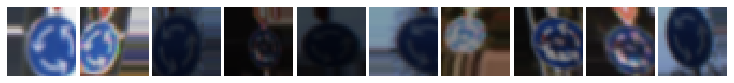

41 . Class :  End of no passing


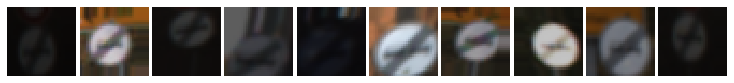

42 . Class :  End of no passing by vehicles over 3.5 metric tons


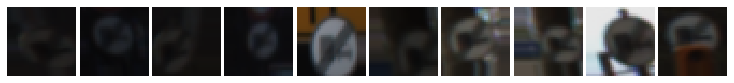

In [7]:
# visualization of results of data augmentation
for each_c, each_c_i, each_c_c in zip(classes, class_indices, class_counts):
    print(each_c, ". Class : ", sign_names[each_c] )
    figs,axes=plt.subplots(1,10,figsize=(10,1))
    figs.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        random_indices = np.random.randint(each_c_i, each_c_i+each_c_c, 10)
        axes[i].imshow(transform_image(X_train[random_indices[i],:,:,:]))
        axes[i].axis('off')        
    pyplot.show()

In [8]:
# Perform data augmentation
# First: random transform images
# Seconde: generate more transformed images to make the distribution of classes same.

def data_augmentation(X_train, y_train, total_per_class =5000):
    classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
    height, width, channels = X_train[0].shape
    X_total = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    y_total = np.empty([0], dtype = y_train.dtype)
    
    for each_c,each_c_i, each_c_c in zip(classes,class_indices, class_counts):
        num_extra=total_per_class-each_c_c
        ##Copy over the current data for the given class
        X_orig = X_train[y_train == each_c]
        y_orig = y_train[y_train == each_c]
        ##Add original data to the new dataset
        X_total = np.append(X_total, X_orig, axis=0)
        y_total=np.append(y_total,y_orig)
        print(each_c," : ",each_c_c," + ", num_extra)
        X_extra = np.empty([num_extra, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
        y_extra=np.empty([num_extra],dtype = y_train.dtype)
        for i in range(num_extra):
            rand_id=np.random.randint(each_c_i,each_c_i+each_c_c)
            X_extra[i,:,:,:] = transform_image(X_train[rand_id]).reshape((1, height, width, channels))
            y_extra[i]=each_c
            
        X_total = np.append(X_total,X_extra, axis=0)
        y_total= np.append(y_total,y_extra)
        
    return X_total.astype(np.uint8), y_total

In [9]:
# Save the augmentation data
# I just generate max 4000 images, because large samples will slow the computation speed of my computer. You can set more bigger.
# Dont need run it every time, just one time
X_train_aug,y_train_aug=data_augmentation(X_train, y_train, total_per_class =4000)
np.savez_compressed('dataset/AugTrafficdata', X_train_aug = X_train_aug, y_train_aug = y_train_aug)

0  :  180  +  3820
1  :  1980  +  2020
2  :  2010  +  1990
3  :  1260  +  2740
4  :  1770  +  2230
5  :  1650  +  2350
6  :  360  +  3640
7  :  1290  +  2710
8  :  1260  +  2740
9  :  1320  +  2680
10  :  1800  +  2200
11  :  1170  +  2830
12  :  1890  +  2110
13  :  1920  +  2080
14  :  690  +  3310
15  :  540  +  3460
16  :  360  +  3640
17  :  990  +  3010
18  :  1080  +  2920
19  :  180  +  3820
20  :  300  +  3700
21  :  270  +  3730
22  :  330  +  3670
23  :  450  +  3550
24  :  240  +  3760
25  :  1350  +  2650
26  :  540  +  3460
27  :  210  +  3790
28  :  480  +  3520
29  :  240  +  3760
30  :  390  +  3610
31  :  690  +  3310
32  :  210  +  3790
33  :  599  +  3401
34  :  360  +  3640
35  :  1080  +  2920
36  :  330  +  3670
37  :  180  +  3820
38  :  1860  +  2140
39  :  270  +  3730
40  :  300  +  3700
41  :  210  +  3790
42  :  210  +  3790


0 . Class :  Speed limit (20km/h)


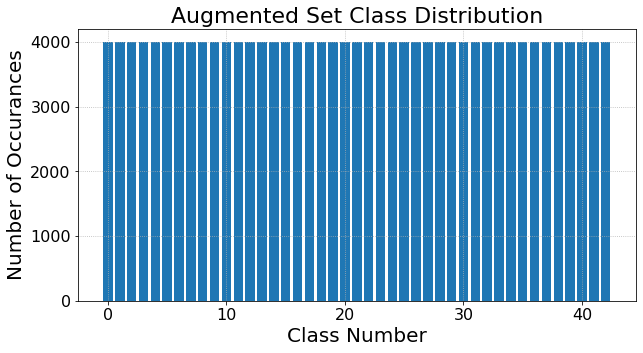

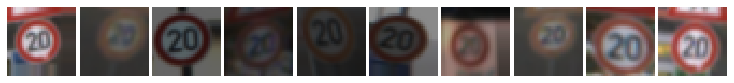

1 . Class :  Speed limit (30km/h)


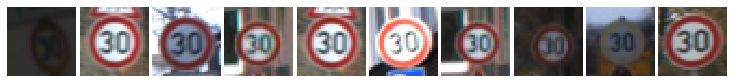

2 . Class :  Speed limit (50km/h)


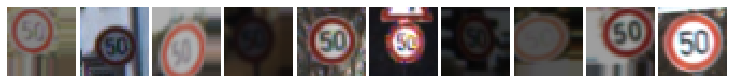

3 . Class :  Speed limit (60km/h)


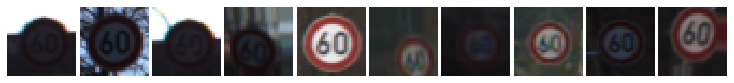

4 . Class :  Speed limit (70km/h)


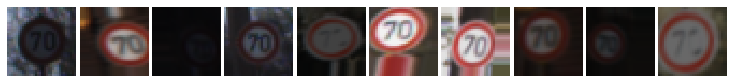

5 . Class :  Speed limit (80km/h)


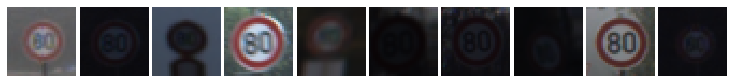

6 . Class :  End of speed limit (80km/h)


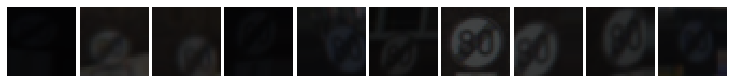

7 . Class :  Speed limit (100km/h)


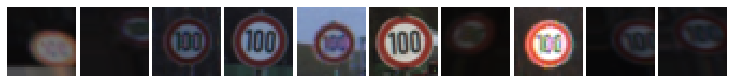

8 . Class :  Speed limit (120km/h)


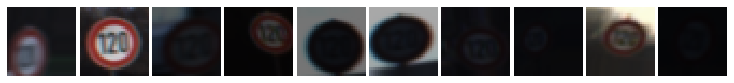

9 . Class :  No passing


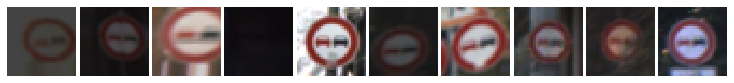

10 . Class :  No passing for vehicles over 3.5 metric tons


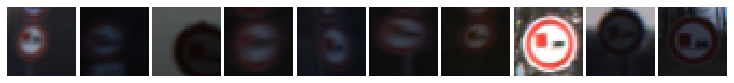

11 . Class :  Right-of-way at the next intersection


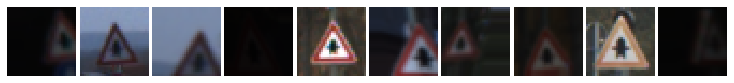

12 . Class :  Priority road


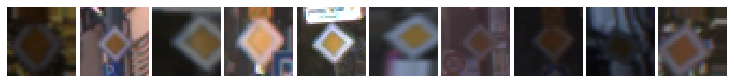

13 . Class :  Yield


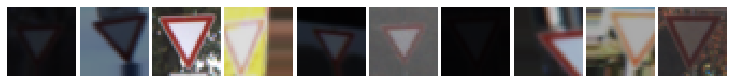

14 . Class :  Stop


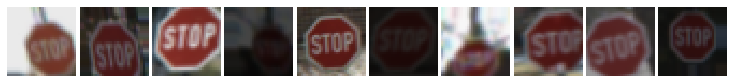

15 . Class :  No vehicles


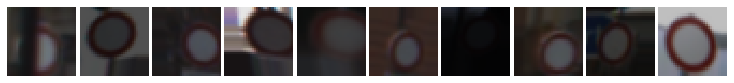

16 . Class :  Vehicles over 3.5 metric tons prohibited


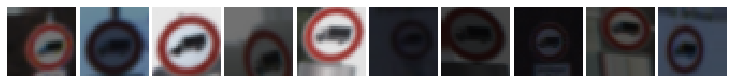

17 . Class :  No entry


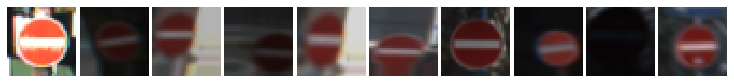

18 . Class :  General caution


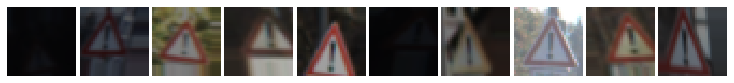

19 . Class :  Dangerous curve to the left


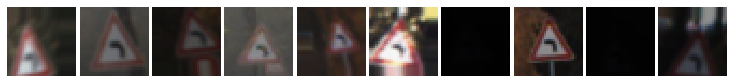

20 . Class :  Dangerous curve to the right


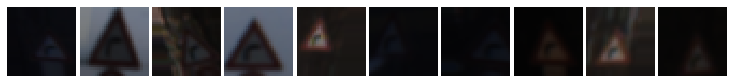

21 . Class :  Double curve


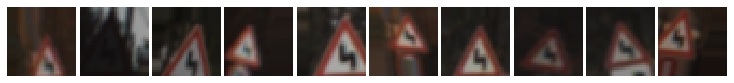

22 . Class :  Bumpy road


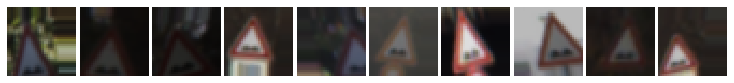

23 . Class :  Slippery road


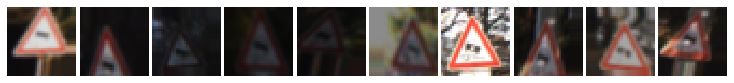

24 . Class :  Road narrows on the right


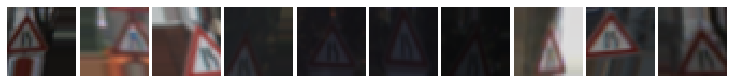

25 . Class :  Road work


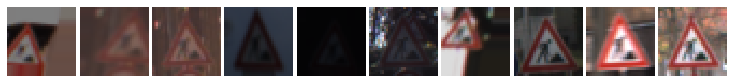

26 . Class :  Traffic signals


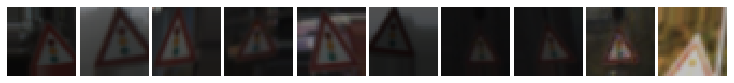

27 . Class :  Pedestrians


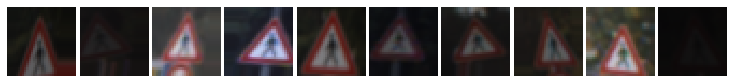

28 . Class :  Children crossing


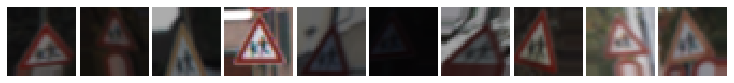

29 . Class :  Bicycles crossing


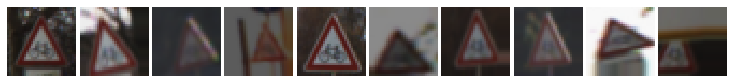

30 . Class :  Beware of ice/snow


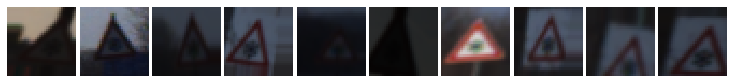

31 . Class :  Wild animals crossing


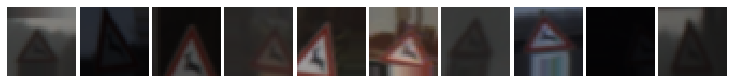

32 . Class :  End of all speed and passing limits


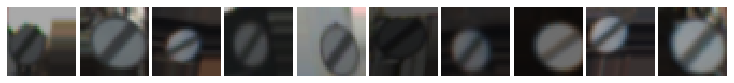

33 . Class :  Turn right ahead


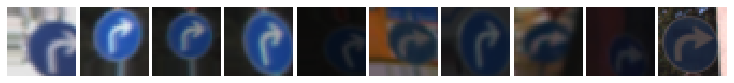

34 . Class :  Turn left ahead


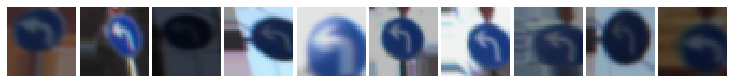

35 . Class :  Ahead only


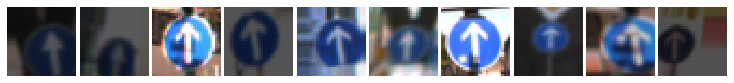

36 . Class :  Go straight or right


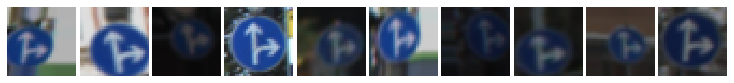

37 . Class :  Go straight or left


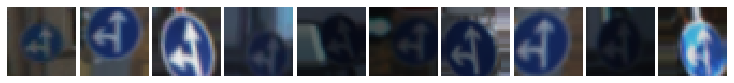

38 . Class :  Keep right


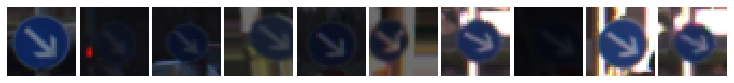

39 . Class :  Keep left


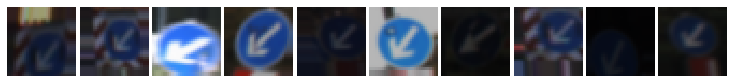

40 . Class :  Roundabout mandatory


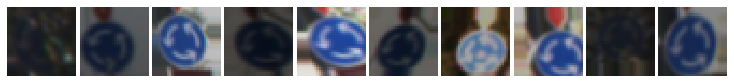

41 . Class :  End of no passing


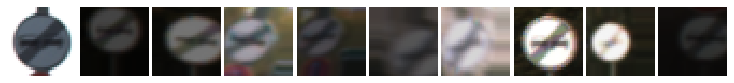

42 . Class :  End of no passing by vehicles over 3.5 metric tons


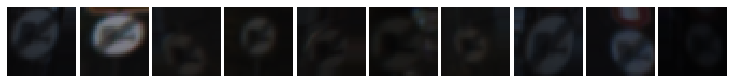

In [10]:
# visualization of new data after data augmentation
plt.figure(0, figsize = (10,5))
total_classes, total_indices,total_counts = np.unique(y_train_aug,  return_index=True,return_counts = True)
plt.bar(total_classes, total_counts)

plt.title('Augmented Set Class Distribution', fontsize=22)
plt.xlabel('Class Number', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

for each_c, each_c_i, each_c_c in zip(total_classes, total_indices, total_counts):
    print(each_c, ". Class : ", sign_names[each_c] )
    figs,axes=plt.subplots(1,10,figsize=(10,1))
    figs.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        random_indices = np.random.randint(each_c_i, each_c_i+each_c_c, 10)
        axes[i].imshow(X_train_aug[random_indices[i],:,:,:])
        axes[i].axis('off')        
    pyplot.show()


In [11]:
# From here we start to prepare and train deep learning model

from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf
import os
import cv2

In [13]:
loaded = np.load('dataset/AugTrafficdata.npz')
X_train_aug = loaded['X_train_aug']
y_train_aug = loaded['y_train_aug']
print("Augmented Dataset size X")
print(X_train_aug.shape)
print("Augmented Dataset size y")
print(y_train_aug.shape)


Augmented Dataset size X
(172000, 32, 32, 3)
Augmented Dataset size y
(172000,)


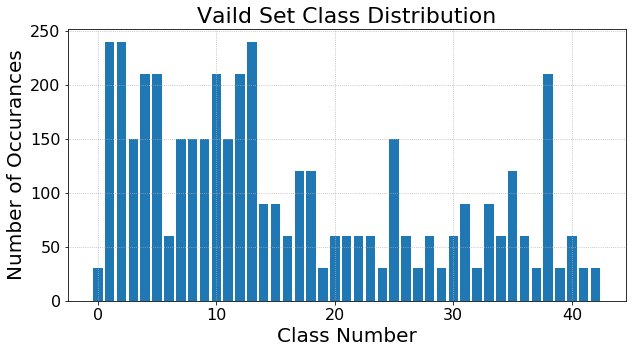

In [14]:
plt.figure(0, figsize = (10,5))
valid_classes, valid_counts = np.unique(y_valid, return_counts = True)
plt.bar(valid_classes, valid_counts)

plt.title('Vaild Set Class Distribution', fontsize=22)
plt.xlabel('Class Number', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

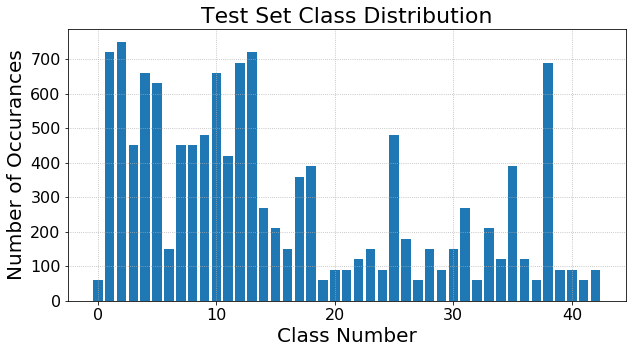

In [15]:
plt.figure(0, figsize = (10,5))
test_classes, test_counts = np.unique(y_test, return_counts = True)
plt.bar(test_classes, test_counts)

plt.title('Test Set Class Distribution', fontsize=22)
plt.xlabel('Class Number', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

In [16]:
# Preprocessing the images by using histogram equalization
def equalize_histogram(image):
    image = image.astype(np.uint8)
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    
    # equalize the histogram of the Y channel
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8,8))
    image_yuv[:,:,0] = clahe.apply(image_yuv[:,:,0])
    
    # convert the YUV image back to RGB format
    image_output = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
    return image_output

# Perform images normalisation 
def normalisation(X):
    X_n = np.empty(shape=X.shape)
    a = 0.1
    b = 0.9
    for i, img in enumerate(X):
        temp = equalize_histogram(img)
        X_max = np.amax(temp)
        X_min = np.amin(temp)
        X_n[i] = a + (temp - X_min)*(b - a)/(X_max - X_min)
    return X_n



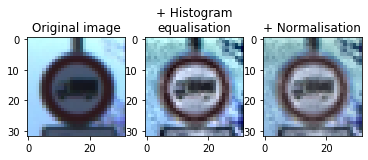

In [17]:
#  visualization of new data after normalisation
test_image = X_train[np.random.randint(0, X_train.shape[0])]
test_image_eqhist = equalize_histogram(test_image)
test_image_norm = normalisation(np.expand_dims(test_image, axis=0))

f, axarr = plt.subplots(1,3)
axarr[0].imshow(test_image, interpolation='nearest')
axarr[0].set_title("Original image")
axarr[1].imshow(test_image_eqhist, interpolation='nearest')
axarr[1].set_title("+ Histogram" + '\n' + "equalisation")
axarr[2].imshow(test_image_norm[0], interpolation='nearest')
axarr[2].set_title("+ Normalisation")

plt.savefig('Normalisation.jpg', bbox_inches='tight')
plt.show()

In [18]:
# Preprocessing all data by using normalisation and equalization.

X_train = normalisation(X_train)
X_train_aug = normalisation(X_train_aug)
X_valid = normalisation(X_valid)
X_test=normalisation(X_test)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(X_train_aug.shape)


(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)
(172000, 32, 32, 3)


0 . Class :  Speed limit (20km/h)


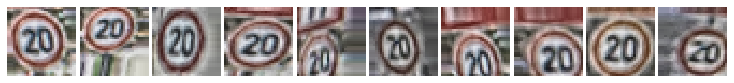

1 . Class :  Speed limit (30km/h)


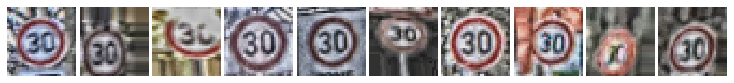

2 . Class :  Speed limit (50km/h)


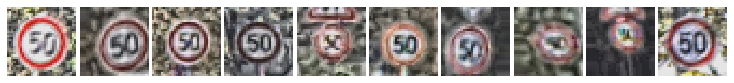

3 . Class :  Speed limit (60km/h)


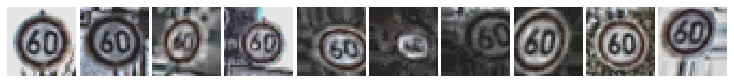

4 . Class :  Speed limit (70km/h)


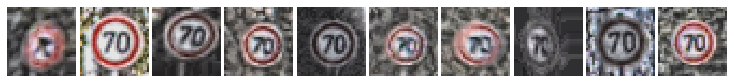

5 . Class :  Speed limit (80km/h)


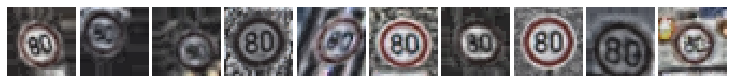

6 . Class :  End of speed limit (80km/h)


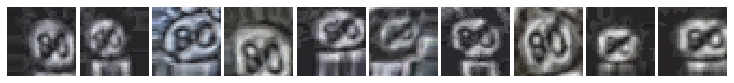

7 . Class :  Speed limit (100km/h)


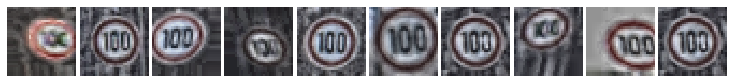

8 . Class :  Speed limit (120km/h)


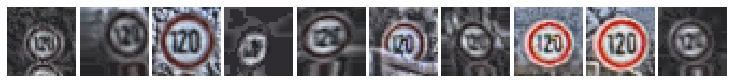

9 . Class :  No passing


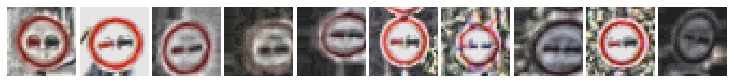

10 . Class :  No passing for vehicles over 3.5 metric tons


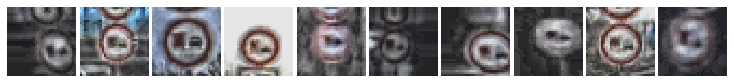

11 . Class :  Right-of-way at the next intersection


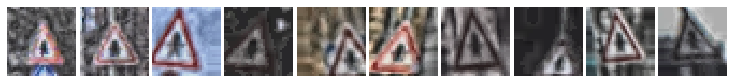

12 . Class :  Priority road


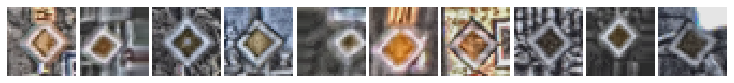

13 . Class :  Yield


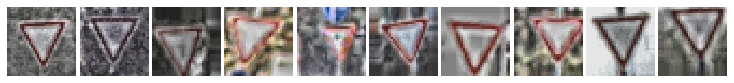

14 . Class :  Stop


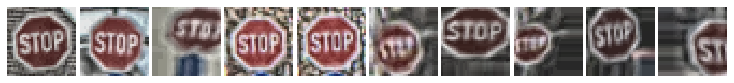

15 . Class :  No vehicles


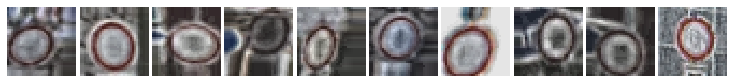

16 . Class :  Vehicles over 3.5 metric tons prohibited


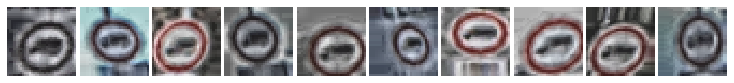

17 . Class :  No entry


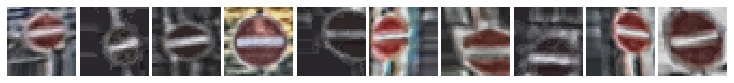

18 . Class :  General caution


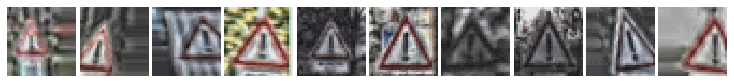

19 . Class :  Dangerous curve to the left


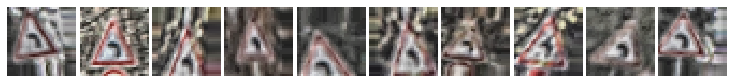

20 . Class :  Dangerous curve to the right


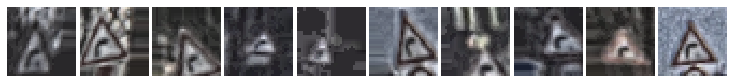

21 . Class :  Double curve


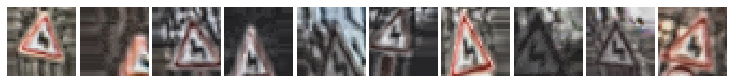

22 . Class :  Bumpy road


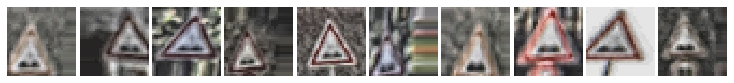

23 . Class :  Slippery road


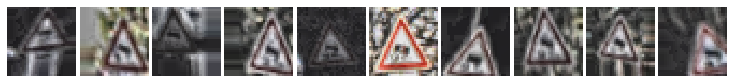

24 . Class :  Road narrows on the right


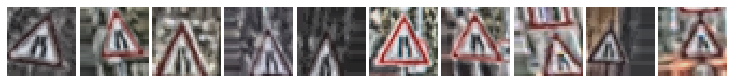

25 . Class :  Road work


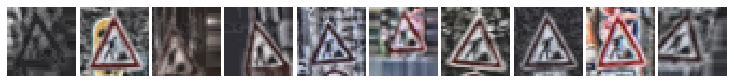

26 . Class :  Traffic signals


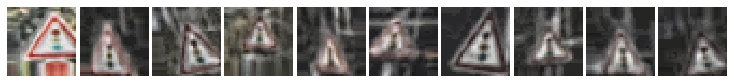

27 . Class :  Pedestrians


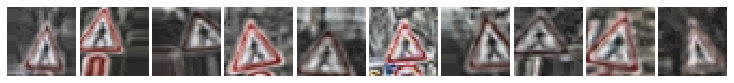

28 . Class :  Children crossing


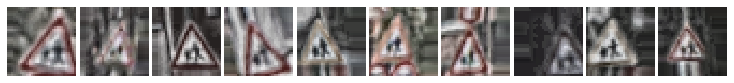

29 . Class :  Bicycles crossing


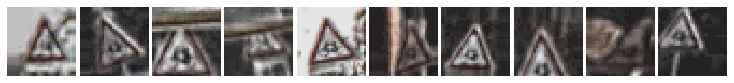

30 . Class :  Beware of ice/snow


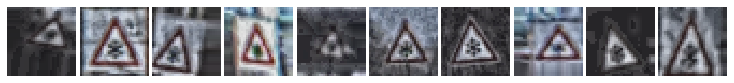

31 . Class :  Wild animals crossing


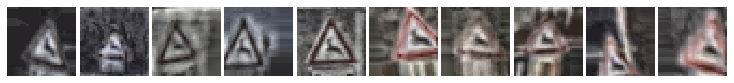

32 . Class :  End of all speed and passing limits


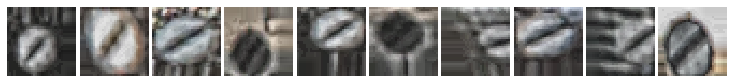

33 . Class :  Turn right ahead


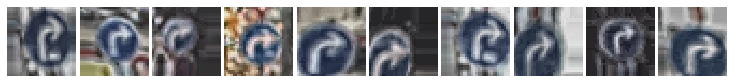

34 . Class :  Turn left ahead


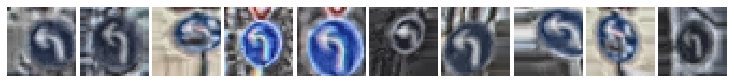

35 . Class :  Ahead only


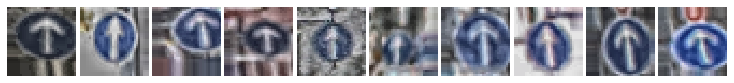

36 . Class :  Go straight or right


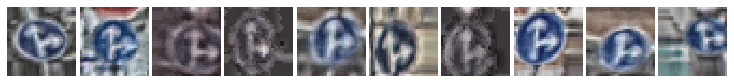

37 . Class :  Go straight or left


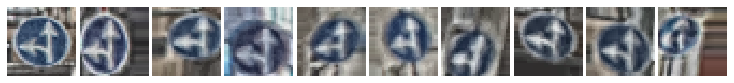

38 . Class :  Keep right


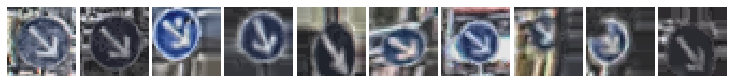

39 . Class :  Keep left


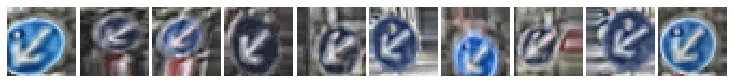

40 . Class :  Roundabout mandatory


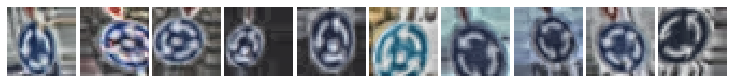

41 . Class :  End of no passing


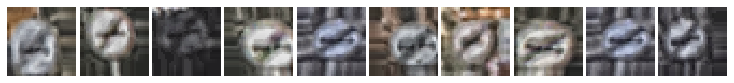

42 . Class :  End of no passing by vehicles over 3.5 metric tons


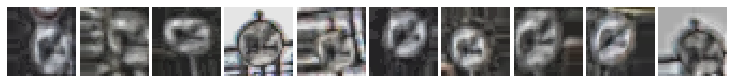

In [19]:
# Preprocessing all data by using normalisation and equalization.
aug_classes, aug_indices,aug_counts = np.unique(y_train_aug,  return_index=True,return_counts = True)

for each_c, each_c_i, each_c_c in zip(aug_classes, aug_indices, aug_counts):
    print(each_c, ". Class : ", sign_names[each_c] )
    figs,axes=plt.subplots(1,10,figsize=(10,1))
    figs.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        random_indices = np.random.randint(each_c_i, each_c_i+each_c_c, 10)
        axes[i].imshow(X_train_aug[random_indices[i],:,:,:],interpolation='nearest')
        axes[i].axis('off')        
    pyplot.show()

### Model Architecture

In [20]:
## Train your model here.
## Calculate and report the accuracy on the training and validation set.
## Once a final model architecture is selected, 
## the accuracy on the test set should be calculated and reported as well.
## Feel free to use as many code cells as needed.


# here i use densenet model, which is more smaller and efficienter. But it waste too many GPU memory and a little slow.
# this is principle : https://github.com/taki0112/Densenet-Tensorflow
# this is code example of densenet : https://github.com/taki0112/Densenet-Tensorflow/blob/master/MNIST/Densenet_MNIST.py

#  i use Mini-batch , MomentumOptimizer ，l2-regulation, weight-decay

def get_weight(shape,name=None):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def get_bias(shape,name=None):
    initial = tf.constant(0.01, shape=shape)
    return tf.Variable(initial)

def batch_norm(input, is_train=None):
    return tf.contrib.layers.batch_norm(input, scale=True, is_training=is_train, updates_collections=None)
    

def conv2d(input, in_layers, out_layers, kernel_size, with_bias=False):
    W = get_weight([ kernel_size, kernel_size, in_layers, out_layers ])
    conv = tf.nn.conv2d(input, W, [ 1, 1, 1, 1 ], padding='SAME')
    if with_bias:
        return conv + get_bias([ out_layers ])
    return conv


def batch_activ_conv(current, in_layers, out_layers, kernel_size, is_training, keep_prob):
    current = tf.contrib.layers.batch_norm(current, scale=True, is_training=is_training, updates_collections=None)
    current = tf.nn.relu(current)
    current = conv2d(current, in_layers, out_layers, kernel_size)
    current = tf.nn.dropout(current, keep_prob)
    return current

def dense_block(input, num_layers, in_layers, growth, is_training, keep_prob):
    output = input
    out_layers = in_layers
    for index in range(num_layers):
        tmp = batch_activ_conv(output, out_layers, growth, 3, is_training, keep_prob)
        output = tf.concat( [output, tmp], 3)
        out_layers += growth
    return output, out_layers


def avg_pool(input, s):
    return tf.nn.avg_pool(input, [ 1, s, s, 1 ], [1, s, s, 1 ], 'VALID')

def full_connect(input,input_layers,out_layers):
    output = tf.reshape(input, [ -1, input_layers ])
    Wfc = get_weight([ input_layers, out_layers ])
    bfc = get_bias([ out_layers ])
    logits = tf.matmul(output, Wfc) + bfc 
    return logits




In [34]:
# define densenet model

def DenseNet(X, y , keep_prob, is_train, depth=40):
    
    num_layers = int((depth-4) / 3)
#     print('number of features : ',num_layers)
    
    #Inital convolution
    conv_1 = conv2d(X, 3, 16, 3)
#     print('input shape: ',X.shape)
#     print('kern size: 3*3','padding size: 1*1')
#     print('conv_1 shape: ',conv_1.shape)
    
    #First DenseBlock
    block_1, features = dense_block(conv_1, num_layers, 16, 12, is_train, keep_prob)
    
    bac_1 = batch_activ_conv(block_1, features, features, 1, is_train, keep_prob)
    pool_1 = avg_pool(bac_1, 2)
    
#     print('block_1 shape: ',block_1.shape)
#     print('features number: ',features)
#     print('kern size: 12*12','padding size: 1*1')
#     print('bac_1 shape: ',bac_1.shape)
#     print('pool_1 shape: ',pool_1.shape)
    
    #Second DenseBlock
    block_2, features = dense_block(pool_1, num_layers, features, 12, is_train, keep_prob)
    
    bac_2 = batch_activ_conv(block_2, features, features, 1, is_train, keep_prob)
    pool_2 = avg_pool(bac_2, 2)
    
#     print('block_2 shape: ',block_2.shape)
#     print('features number: ',features)
#     print('kern size: 12*12','padding size: 1*1')
#     print('bac_2 shape: ',bac_2.shape)
#     print('pool_2 shape: ',pool_2.shape)
    
    #Third DenseBlock
    block_3, features = dense_block(pool_2, num_layers, features, 12, is_train, keep_prob)
    
#     print('block_3 shape: ',block_3.shape)
#     print('features number: ',features)
    
    bn_3 = batch_norm(block_3,is_train)
    relu_3 = tf.nn.relu(bn_3)
    pool_3 = avg_pool(relu_3, 8)
    final_layers = features
#     print('bn_3 shape: ',bn_3.shape)
#     print('relu_3 shape: ',relu_3.shape)
#     print('pool_3 shape: ',pool_3.shape)
#     print('final features: ', final_layers)
    
    logits=full_connect(pool_3,final_layers,43) 
#     print('output shape',logits.shape)
    return logits



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

DenseNet Model
Initalising traffic sign classification model

#Inital convolution

number of features :  12

input shape:  (?, 32, 32, 3)

conv kern size: 3x3 padding size: 1x 1

conv_1 shape:  (?, 32, 32, 16)

#First DenseBlock

block_1 shape:  (?, 32, 32, 160)

block_1 features number:  160

conv kern size: 12x12 padding size: 1x 1

bac_1 shape:  (?, 32, 32, 160)

pool_1 shape:  (?, 16, 16, 160) kern size 2*2


#Second DenseBlock

block_2 shape:  (?, 16, 16, 304)

block_2 features number:  304

conv kern size: 12x12 padding size: 1x 1

bac_2 shape:  (?, 16, 16, 304)

pool_2 shape:  (?, 8, 8, 304)kern size 8x8

#Third DenseBlock

block_3 shape:  (?, 8, 8, 448)

features number:  448

bn_3 shape:  (?, 8, 8, 448)

relu_3 shape:  (?, 8, 8, 448)

pool_3 shape:  (?, 1, 1, 448)kern size 8x8

final features:  448

#Output

output shape (?, 43)

In [35]:
# Initial parameters

#Dataset parameters
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
IMAGE_CHANNELS = 3
NO_CLASSES = 43

# normaly the epochs can be setted to 100, but i think it is too slow, so i just set to 10.
EPOCHS = 30
BATCH_SIZE = 64


LEARNING_RATE =0.01
KEEP_PROB = 0.9
WEIGHT_DECAY=0

# build store folders
def get_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    return directory


SAVE_DIR = get_dir('SAVE/')
MODEL_SAVE_DIR = get_dir(SAVE_DIR + 'Models/')

In [36]:
# define all the tensorflow operation in this class, so that we can easily access.
class DenseNetStarter:
    def __init__(self, session, learning_rate=0.1, weight_decay=0.0001, keep_prob = 0.8):

        self.sess = session
        self.learning_rate_init = learning_rate
        self.weight_decay = weight_decay
        self.input_keep_prob = keep_prob
        self.init_graph()

    def start_training(self, batch_X, batch_y):

        feed_dict = {self.input_image : batch_X, self.y : batch_y, self.keep_prob: self.input_keep_prob ,self.is_train : True, self.learning_rate : self.learning_rate_init}

        _, loss, global_step = self.sess.run([self.train_step, self.mean_loss,  self.global_step, ], feed_dict=feed_dict)
        
        # show the variation of accuracy and loss each 200 interation
        if global_step % 200 ==0:
            train_accuracy = self.sess.run(self.accuracy_operation, feed_dict= {self.input_image : batch_X, self.y : batch_y, self.keep_prob :1.0, self.is_train :False})
            print("Iteration ", global_step, ": with training loss = ", loss, " and accuracy of " , train_accuracy)

            
        ##Code to change the learning rate with the number or epochs needed

    def init_graph(self):

        print("Initalising traffic sign classification model")
        #Define the inputs for the model
        with tf.name_scope('Inputs'):
            self.input_image = tf.placeholder(tf.float32, shape=[None, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS], name='Input_X')
            self.y = tf.placeholder(tf.int32, (None), name ='Input_y')
             # perform onehot for y-data
            self.one_hot_y = tf.one_hot(self.y, NO_CLASSES)
            self.is_train = tf.placeholder(tf.bool)
            self.keep_prob = tf.placeholder(tf.float32)
            self.learning_rate = tf.placeholder(tf.float32)
            self.k = tf.placeholder(tf.int32)
            

        ##Run batch through model to get logits
        self.y_out = DenseNet(self.input_image, self.one_hot_y, self.keep_prob ,self.is_train)


        #Calculate the losses
        with tf.name_scope('Train'):
            
            self.l2 = tf.add_n([tf.nn.l2_loss(var) for var in tf.trainable_variables()])
            self.total_loss = tf.nn.softmax_cross_entropy_with_logits(labels=self.one_hot_y , logits=self.y_out)
            self.mean_loss = tf.reduce_mean(self.total_loss)
            self.loss = self.mean_loss + self.l2*self.weight_decay
           
            self.correct_prediction = tf.equal(tf.argmax(self.y_out, 1), tf.argmax( self.one_hot_y,1))
            self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
            
            # get model's softmax probabilities to show the certainty of the model's predictions
            self.probs = tf.nn.softmax(self.y_out)
            self.top_probs = tf.nn.top_k(self.probs, self.k)
            
    

        with tf.name_scope('Optimiser'):
            self.global_step = tf.Variable(0, trainable=False, name='global_step')
            self.optimizer = tf.train.MomentumOptimizer(self.learning_rate, 0.9, use_nesterov=True)
            self.train_step = self.optimizer.minimize(self.loss, global_step = self.global_step)



    def evaluate(self, X, y, max_batch = 128):
        num_examples = len(X)
        total_acc = 0 
        total_loss =0
        
        for offset in range(0, num_examples, max_batch):
            batch_X , batch_y = X[offset:offset + max_batch], y[offset: offset + max_batch]
            # keep prob =1.0
            feed_dict = {self.input_image : batch_X, self.y : batch_y, self.is_train : False, self.keep_prob: 1.0}
            accuracy, loss = self.sess.run([self.accuracy_operation, self.mean_loss ], feed_dict= feed_dict)
            total_acc += (accuracy * len(batch_X))
            total_loss += (loss * len(batch_X))
        return total_acc / num_examples, total_loss / num_examples
    
    def classify_images(self, X, top_k =5):
        num_images = len(X)
        feed_dict = {self.input_image : X, self.is_train : False, self.keep_prob: 1.0, self.k : top_k}
        probs = self.sess.run(self.top_probs, feed_dict= feed_dict)
        return probs




In [37]:
# use to store the accuracy and loss of each dataset
valid_hist_acc = []
train_hist_acc = []
valid_hist_loss = []
train_hist_loss = []
tf.reset_default_graph()

with tf.Session() as sess:

    print('DenseNet Model')
    TrafficNet = DenseNetStarter(sess, LEARNING_RATE, WEIGHT_DECAY, KEEP_PROB)

        
    Saver = tf.train.Saver(max_to_keep=100)
    sess.run(tf.global_variables_initializer())
        
    num_examples = len(X_train_aug)
    print("Training...")
    print()
    for i in range(len(valid_hist_acc), EPOCHS):
        X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[offset:end], y_train_aug[offset:end]
            TrafficNet.start_training(batch_x, batch_y)
            
        validation_accuracy, valid_loss = TrafficNet.evaluate(X_valid, y_valid, max_batch = BATCH_SIZE)
        training_accuracy, training_loss = TrafficNet.evaluate(X_train, y_train, max_batch = BATCH_SIZE)
        valid_hist_acc.append(validation_accuracy)
        train_hist_acc.append(training_accuracy)
        valid_hist_loss.append(valid_loss)
        train_hist_loss.append(training_loss)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
#         plot_training(train_hist, valid_hist)
        if i % 1 ==0:
            print('Saving model ...')
            Saver.save(sess, MODEL_SAVE_DIR + 'densenet.ckpt', global_step=i)
            
#         if validation_accuracy>=0.99:
#             break
            

DenseNet Model
Initalising traffic sign classification model
Training...

Iteration  200 : with training loss =  2.543078  and accuracy of  0.015625
Iteration  400 : with training loss =  2.0223236  and accuracy of  0.0
Iteration  600 : with training loss =  1.377737  and accuracy of  0.0625
Iteration  800 : with training loss =  0.7608124  and accuracy of  0.0
Iteration  1000 : with training loss =  0.4602877  and accuracy of  0.015625
Iteration  1200 : with training loss =  0.3219059  and accuracy of  0.109375
Iteration  1400 : with training loss =  0.21016732  and accuracy of  0.390625
Iteration  1600 : with training loss =  0.20420977  and accuracy of  0.4375
Iteration  1800 : with training loss =  0.24702291  and accuracy of  0.28125
Iteration  2000 : with training loss =  0.20524386  and accuracy of  0.234375
Iteration  2200 : with training loss =  0.21965015  and accuracy of  0.546875
Iteration  2400 : with training loss =  0.09839332  and accuracy of  0.71875
Iteration  2600 : 

Iteration  19600 : with training loss =  0.0016875282  and accuracy of  1.0
Iteration  19800 : with training loss =  0.0022801557  and accuracy of  1.0
Iteration  20000 : with training loss =  0.003641712  and accuracy of  1.0
Iteration  20200 : with training loss =  0.004635774  and accuracy of  0.984375
Iteration  20400 : with training loss =  0.004793978  and accuracy of  0.984375
Iteration  20600 : with training loss =  0.0073654125  and accuracy of  0.96875
Iteration  20800 : with training loss =  0.004467535  and accuracy of  1.0
Iteration  21000 : with training loss =  0.0050022397  and accuracy of  0.984375
Iteration  21200 : with training loss =  0.0055701425  and accuracy of  0.9375
Iteration  21400 : with training loss =  0.0009222034  and accuracy of  1.0
EPOCH 8 ...
Validation Accuracy = 0.984
Training Accuracy = 0.998

Saving model ...
Iteration  21600 : with training loss =  0.0043108207  and accuracy of  1.0
Iteration  21800 : with training loss =  0.0017633055  and acc

Iteration  39400 : with training loss =  0.0017582178  and accuracy of  1.0
Iteration  39600 : with training loss =  0.002571216  and accuracy of  1.0
Iteration  39800 : with training loss =  0.003244803  and accuracy of  1.0
Iteration  40000 : with training loss =  0.006793803  and accuracy of  1.0
Iteration  40200 : with training loss =  0.037584577  and accuracy of  1.0
EPOCH 15 ...
Validation Accuracy = 0.992
Training Accuracy = 0.999

Saving model ...
Iteration  40400 : with training loss =  0.0005362739  and accuracy of  1.0
Iteration  40600 : with training loss =  0.00091973844  and accuracy of  0.984375
Iteration  40800 : with training loss =  0.000624933  and accuracy of  1.0
Iteration  41000 : with training loss =  0.00078879506  and accuracy of  1.0
Iteration  41200 : with training loss =  0.001104421  and accuracy of  1.0
Iteration  41400 : with training loss =  0.0035318492  and accuracy of  1.0
Iteration  41600 : with training loss =  0.0033529317  and accuracy of  1.0
It

Iteration  59200 : with training loss =  0.00016869983  and accuracy of  1.0
Iteration  59400 : with training loss =  0.03148279  and accuracy of  1.0
Iteration  59600 : with training loss =  0.0016248131  and accuracy of  0.984375
Iteration  59800 : with training loss =  0.0021778257  and accuracy of  1.0
Iteration  60000 : with training loss =  0.00037424406  and accuracy of  1.0
Iteration  60200 : with training loss =  0.0002862193  and accuracy of  1.0
Iteration  60400 : with training loss =  0.00041149458  and accuracy of  1.0
Iteration  60600 : with training loss =  0.00018251975  and accuracy of  1.0
Iteration  60800 : with training loss =  0.00015556361  and accuracy of  1.0
Iteration  61000 : with training loss =  0.0001890326  and accuracy of  1.0
Iteration  61200 : with training loss =  0.0020967207  and accuracy of  1.0
Iteration  61400 : with training loss =  0.0039883642  and accuracy of  0.984375
Iteration  61600 : with training loss =  0.0002087419  and accuracy of  1.0

Iteration  79200 : with training loss =  0.0004946013  and accuracy of  1.0
Iteration  79400 : with training loss =  0.00022410814  and accuracy of  1.0
Iteration  79600 : with training loss =  1.949724e-05  and accuracy of  1.0
Iteration  79800 : with training loss =  0.00021236732  and accuracy of  1.0
Iteration  80000 : with training loss =  0.00013404764  and accuracy of  1.0
Iteration  80200 : with training loss =  0.00057925674  and accuracy of  1.0
Iteration  80400 : with training loss =  0.010595691  and accuracy of  1.0
Iteration  80600 : with training loss =  0.00046735117  and accuracy of  1.0
EPOCH 30 ...
Validation Accuracy = 0.988
Training Accuracy = 1.000

Saving model ...


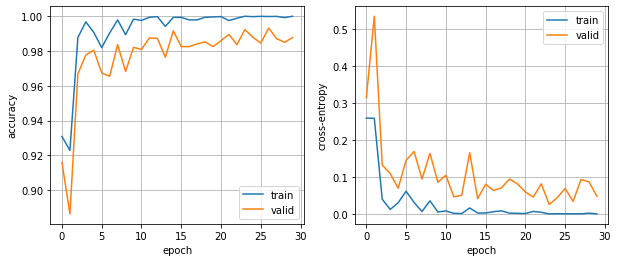

In [38]:
# plot the diagram of variation of accuracy and loss
def plot_training(train_hist_acc_in, valid_hist_acc_in, train_hist_loss_in, valid_hist_loss_in):
    curves_figure = pyplot.figure(figsize = (10, 4))
    axis = curves_figure.add_subplot(1,2,1)
    axis.plot(train_hist_acc_in, label='train')
    axis.plot(valid_hist_acc_in, label='valid')
    pyplot.grid()
    pyplot.legend()
    pyplot.xlabel("epoch")
    pyplot.ylabel("accuracy")
    
    axis = curves_figure.add_subplot(1,2,2)
    axis.plot(train_hist_loss_in, label='train')
    axis.plot(valid_hist_loss_in, label='valid')
    pyplot.grid()
    pyplot.legend()
    pyplot.xlabel("epoch")
    pyplot.ylabel("cross-entropy")



plot_training( train_hist_acc, valid_hist_acc,  train_hist_loss, valid_hist_loss )

In [40]:
# restore the model and test it in test_dataset
# test_data need to be preprocessed

SAVE_DIR = get_dir('SAVE/')
MODEL_SAVE_DIR = get_dir(SAVE_DIR + 'Models/')
MODEL_LOAD_PATH = './' + MODEL_SAVE_DIR + 'densenet.ckpt-29'

tf.reset_default_graph()

with tf.Session() as sess:
    TrafficNet = DenseNetStarter(sess, LEARNING_RATE, WEIGHT_DECAY, KEEP_PROB)
    Saver = tf.train.Saver(max_to_keep=100)
    sess.run(tf.global_variables_initializer())
    if MODEL_LOAD_PATH is not None:
        Saver.restore(sess, MODEL_LOAD_PATH)
        print('Model restored from ' + MODEL_LOAD_PATH)
        acc, loss = TrafficNet.evaluate(X_test, y_test, max_batch = BATCH_SIZE)
        
        print("Final DenseNet accuracy on the test set ", acc*100, "%")
tf.reset_default_graph()


Initalising traffic sign classification model
INFO:tensorflow:Restoring parameters from ./SAVE/Models/densenet.ckpt-29
Model restored from ./SAVE/Models/densenet.ckpt-29
Final DenseNet accuracy on the test set  98.22644497417592 %


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

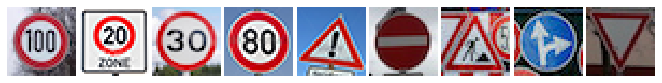

In [42]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images = load_images('./downloaded_signs')

# Resize images and stack them
for i, image in enumerate(images):
    temp = np.copy(image)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    images[i] = np.expand_dims(cv2.resize(temp, (32, 32)), axis=0)
    
figs,axes=plt.subplots(1,9,figsize=(9,1))
figs.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
  
im_data = np.vstack(images)
for i, image in enumerate(im_data):

    axes[i].imshow(image)
    axes[i].axis('off')
    
pyplot.show()

### Predict the Sign Type for Each Image

Initalising traffic sign classification model
INFO:tensorflow:Restoring parameters from ./SAVE/Models/densenet.ckpt-29
Model restored from ./SAVE/Models/densenet.ckpt-29


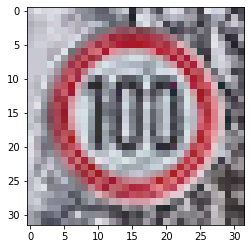

Correct label: Speed limit (100km/h)
Prediced label: Speed limit (100km/h)
Match with the Ground Truth :  0.99990165



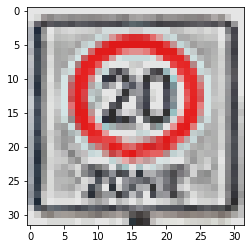

Correct label: Speed limit (20km/h)
Prediced label: Speed limit (20km/h)
Match with the Ground Truth :  0.9996489



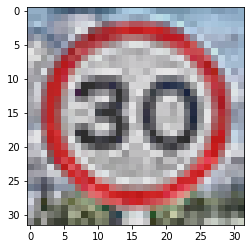

Correct label: Speed limit (30km/h)
Prediced label: Speed limit (30km/h)
Match with the Ground Truth :  0.9999839



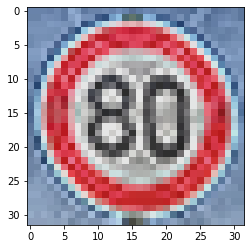

Correct label: Speed limit (80km/h)
Prediced label: Speed limit (80km/h)
Match with the Ground Truth :  0.9971826



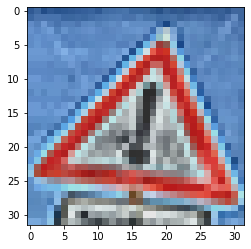

Correct label: General caution
Prediced label: General caution
Match with the Ground Truth :  0.9989901



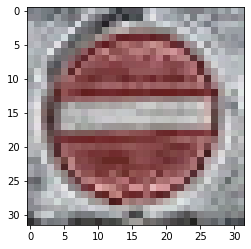

Correct label: No entry
Prediced label: No entry
Match with the Ground Truth :  0.99995637



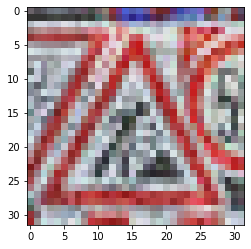

Correct label: Road work
Prediced label: Road work
Match with the Ground Truth :  0.9996406



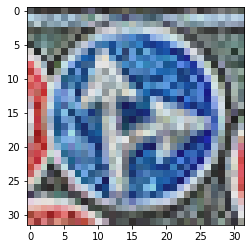

Correct label: Go straight or right
Prediced label: Go straight or right
Match with the Ground Truth :  0.9972976



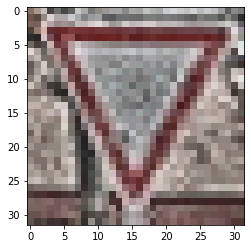

Correct label: Yield
Prediced label: Yield
Match with the Ground Truth :  1.0



In [43]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# load sign_names
sign_names = read_csv("signnames.csv").values[:, 1]
# manual label these images
y_data = np.array([7,0,1,5,18,17,25,36,13])

# preprocess these images
im_data_norm = normalisation(im_data)

SAVE_DIR = get_dir('SAVE/')
MODEL_SAVE_DIR = get_dir(SAVE_DIR + 'Models/')
MODEL_LOAD_PATH = './' + MODEL_SAVE_DIR + 'densenet.ckpt-29'

tf.reset_default_graph()

with tf.Session() as sess:
    
    TrafficNet = DenseNetStarter(sess, LEARNING_RATE, WEIGHT_DECAY, KEEP_PROB)
    Saver = tf.train.Saver(max_to_keep=100)
    sess.run(tf.global_variables_initializer())
    if MODEL_LOAD_PATH is not None:
        Saver.restore(sess, MODEL_LOAD_PATH)
        print('Model restored from ' + MODEL_LOAD_PATH)
        values_dense, indices_dense = TrafficNet.classify_images(im_data_norm)
tf.reset_default_graph()

# compare results
for i in range(len(y_data)):
    plt.figure()
    plt.imshow(im_data_norm[i])
    plt.show()
    print('Correct label: ' + sign_names[y_data[i]] )
    print('Prediced label: ' + sign_names[indices_dense[i]][0] )
    print('Match with the Ground Truth : ', str(values_dense[i][0]))
    print()




### Analyze Performance

In [45]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

SAVE_DIR = get_dir('SAVE/')
MODEL_SAVE_DIR = get_dir(SAVE_DIR + 'Models/')
MODEL_LOAD_PATH = './' + MODEL_SAVE_DIR + 'densenet.ckpt-29'

tf.reset_default_graph()

with tf.Session() as sess:
    TrafficNet = DenseNetStarter(sess, LEARNING_RATE, WEIGHT_DECAY, KEEP_PROB)
    Saver = tf.train.Saver(max_to_keep=100)
    sess.run(tf.global_variables_initializer())
    if MODEL_LOAD_PATH is not None:
        Saver.restore(sess, MODEL_LOAD_PATH)
        print('Model restored from ' + MODEL_LOAD_PATH)
        acc, loss = TrafficNet.evaluate(im_data_norm, y_data, max_batch = BATCH_SIZE)
        
        print("Final DenseNet accuracy on the test set ", acc*100, "%")
tf.reset_default_graph()



Initalising traffic sign classification model
INFO:tensorflow:Restoring parameters from ./SAVE/Models/densenet.ckpt-29
Model restored from ./SAVE/Models/densenet.ckpt-29
Final DenseNet accuracy on the test set  100.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")